## Singular Value Decomposition
- used in linear algebra
- decompose a matrix to its core components
- dimensionality reduction
- express our original matrix as a linear combination of low-rank matrices
- works better with sparse data
  
SVD of a matrix A (of size m x n) is represented as: $ A=UΣV^T $
- $ U $ - m x m orthogonal matrix whose columns are the left singular vectors of A
- $ Σ $ - m x n matrix containing the singular values of A in descending order
- $ V^T $ - transpose of an n x n orthogonal matrix, where the columns are the right singular vectors of A

### Steps:
1. Calculate $ AA^T $
2. Calculate Eigen values of $ AA^T $
    - det($ AA^T - \lambda I $) = 0
3. Find Right Singular Vectors [Eigen Vectors of $ A^TA $ = $ V^T $]
    - for all $ \lambda : (A^TA-\lambda I)v = 0 $ 
4. Compute Left Singular Vectors [Eigen Vectors of $ AA^T $ = Matrix U]
    - $ u_i = (1/\sigma _i) * A * v_i $
5. Find SVD of A as: $ A=UΣV^T $

In [114]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

In [115]:
A = np.array([[3,2,2], [2,3,-2]])
# A = np.array([[4,2,0],[1,5,6]])


In [ ]:
U, singular, V_transpose = np.linalg.svd(A)
print("U = \n", U)
print("\nsingular = \n", singular)
print("\nV_transpose = \n", V_transpose)

U = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

singular = 
 [5. 3.]

V_transpose = 
 [[ 7.07106781e-01  7.07106781e-01  3.67439059e-16]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]


In [117]:
# Make sure singular values are in a diagonal matrix of the correct shape
d = np.diag(singular)

# The diagonal matrix Sigma should have shape (2, 3), so we need to pad it with zeros
s = np.zeros((U.shape[1], V_transpose.shape[0]))
s[:d.shape[0], :d.shape[1]] = d
print(s)
print()

A_remake = (U @ s @ V_transpose)
print(A_remake)

[[5. 0. 0.]
 [0. 3. 0.]]

[[ 3.  2.  2.]
 [ 2.  3. -2.]]


### Truncated Singular Value Decomposition (Truncated SVD)
- dimensionality reduction technique
- similar purpose to PCA
- produce matrices with the specified number of columns

In [118]:
svd = TruncatedSVD(n_components=2)
A_transformed = svd.fit_transform(A)
print("Transformed Matrix:")
print(A_transformed)

Transformed Matrix:
[[ 3.53553391  2.12132034]
 [ 3.53553391 -2.12132034]]


## Image compression


In [119]:
from matplotlib.image import imread
# from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

A = imread('./files/a.jpg')
X = np.double(rgb2gray(A))

plt.rcParams['figure.figsize'] = [3,3]


In [120]:
A = imread('./files/a.jpg')
# X = np.double(rgb2gray(A))
X = np.mean(A, -1)


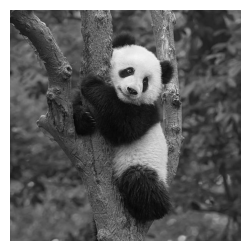

In [121]:
img = plt.imshow(X)      
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [122]:
print(X.shape)
U, singular, V_transpose = np.linalg.svd(X, full_matrices=False)
S = np.diag(singular)
# s = np.zeros((U.shape[1], V_transpose.shape[0]))
# s[:d.shape[0], :d.shape[1]] = d

(612, 612)


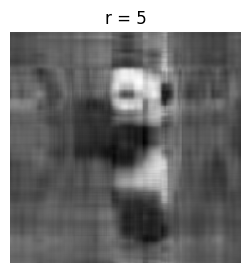

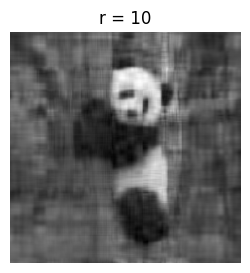

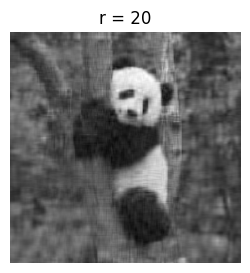

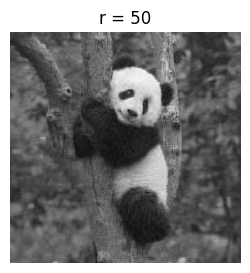

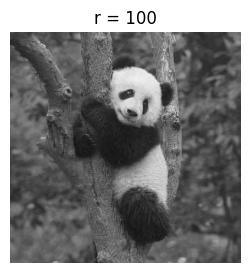

In [123]:
j = 0
for r in (5, 10, 20, 50, 100):
    Xapprox = U[:, :r] @ S[0:r, 0:r] @ V_transpose[:r, :]   # first r columns of U, first r rows of V_transpose
    plt.figure(j+1)
    j += 1
    img =  plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

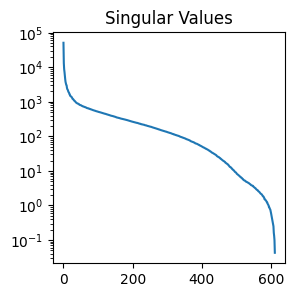

In [124]:
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

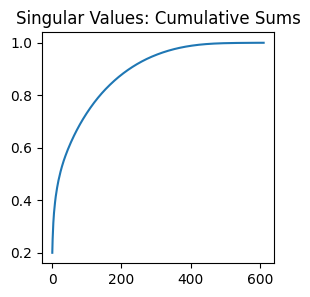

In [125]:
# how much of the matrix is captured by the first r 

plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sums")
plt.show